# Chapter 13: Mathematical Tools

One of the main reasons Python is so popular is that a vast array of tools easily available and usable directly in the language.  This chapter introduces some key some mathematical packages useful for data science and engineering.  Each tool has its own extensive documentation, and the goal of this chapter is just to motivate you to explore and use these packages.

**Numpy** is mathematical package that supports multidimensional arrays and operations on them such as matrix multiplication and linear algebra, see: [https://numpy.org/doc/](https://numpy.org/doc/).  All of the other packages described here rely on Numpy.  It is important to be familiar with multidimensional arrays and various ways they can be manipulated and accessed.

**Scipy** is a collection of mathematical and statistical tools built on Numpy.  Tools include various representations for rotations, as well as clustering, interpolation, sparse arrays, and statistical distributions.   Documentation is available here: [https://docs.scipy.org/doc/scipy/tutorial/general.html](https://docs.scipy.org/doc/scipy/tutorial/general.html).  

**Matplotlib** is a powerful toolbox for 2D and 3D plotting, see: [https://matplotlib.org/](https://matplotlib.org/).  

**OpenCV** provides many image processing and computer vision tools.  While written in C++, it provides a fairly extensive Python interface, enabling it to be used as a Python toolbox, see: [https://docs.opencv.org/4.5.3/](https://docs.opencv.org/4.5.3/).



## Installation and Help

It is best to install these tools in a virtual environment, see [Chapter 12](Chapter_12_Virtual_Environments.md).  First **activate** your virtual environment and then, from the shell command line, install them with
```
python -m pip install numpy scipy matplotlib opencv-python
```
If a package is already installed, this will simply skip it.  Also, any packages that are prerequisites will be installed. 

Now, after the packages are installed they can be accessed by running Python and using the `import` command as explained in [Chapter 11: Modules and Packages](Chapter_11_Modules_and_Packages.md).  For example, Numpy is usually imported with

In [2]:
import numpy as np

Besides online documentation, you can get documentation in your interactive terminal with the `help()` function.  For example if you want to know how the numpy cross product works, you would type:

In [7]:
help(np.cross)

Help on function cross in module numpy:

cross(a, b, axisa=-1, axisb=-1, axisc=-1, axis=None)
    Return the cross product of two (arrays of) vectors.
    
    The cross product of `a` and `b` in :math:`R^3` is a vector perpendicular
    to both `a` and `b`.  If `a` and `b` are arrays of vectors, the vectors
    are defined by the last axis of `a` and `b` by default, and these axes
    can have dimensions 2 or 3.  Where the dimension of either `a` or `b` is
    2, the third component of the input vector is assumed to be zero and the
    cross product calculated accordingly.  In cases where both input vectors
    have dimension 2, the z-component of the cross product is returned.
    
    Parameters
    ----------
    a : array_like
        Components of the first vector(s).
    b : array_like
        Components of the second vector(s).
    axisa : int, optional
        Axis of `a` that defines the vector(s).  By default, the last axis.
    axisb : int, optional
        Axis of `b` that

This will give details on usage of the Numpy `stack()` function.  This is a good way to determine what arguments a function needs.

## Arrays

Arrays provide significant computational efficiencies over lists.  Consider various ways to represent 3D points, such as those collected from a lidar.  A single point could be represented as a class with a `.x`, `.y`, `.z`, or as a list with 3 elements or as a 1D numpy array with 3 elements.  A point cloud could then be either a list of points or a 2D numpy array which stacks 1D point arrays.  Performing an operation over all the points, such as rotating them, could be done by iterating over the list or else as a matrix multiplication applied to the array.  Both are equivalent mathematically, and lists are more flexible, but array operations are faster.  For operations on just a few points (10s or so), which representation you use does not make too much difference.  When there are 10,000 or 100,000 points, which could be a single lidar scan, then array operations could be orders of magnitude faster.  In addition, Numpy and other packages supply operations that are very efficient over arrays and much slower over lists.

Let's do a simple example to compare a list operation with an array operation.  First, let's represent a collection of four 3D points as a list:

In [8]:
point_list = [[1.,0.,0.],[1.,2.,1.],[3.,0.,1.],[4.,2.,0.]]
point_list

[[1.0, 0.0, 0.0], [1.0, 2.0, 1.0], [3.0, 0.0, 1.0], [4.0, 2.0, 0.0]]

To add `1` to each element you can use list comprehension:

In [9]:
new_point_list = [ [x[0]+1,x[1]+1,x[2]+1] for x in point_list]
new_point_list

[[2.0, 1.0, 1.0], [2.0, 3.0, 2.0], [4.0, 1.0, 2.0], [5.0, 3.0, 1.0]]

Clearly that is a little awkward, besides being slow for long lists.  

Now lets convert our list of lists to a Numpy array:

In [10]:
point_array = np.array(point_list)
point_array

array([[1., 0., 0.],
       [1., 2., 1.],
       [3., 0., 1.],
       [4., 2., 0.]])

Our points have been stored as a 2D array with each row being a point and stacked vertically.  Now let's add `1` to each element:

In [12]:
new_point_array = point_array + 1
new_point_array

array([[2., 1., 1.],
       [2., 3., 2.],
       [4., 1., 2.],
       [5., 3., 1.]])

Much easier eh?  And faster to boot!

## Array Indexing

The same indexing and slicing that we saw used for strings is available for each dimension of Numpy arrays.  Thus, for example, our two-dimension array can be indexed with:

In [15]:
new_point_array[0,0]

2.0

In [14]:
new_point_array[0,1]

1.0

The dimensions, or axes as they are called in Numpy, are numbered from left to right.  So the elements of a point, such as `[2., 1., 1.]` are arranged along **axis 1** of the 2D array, and the points are stacked along **axis 0**.  We can access the first point in multiple ways:

In [16]:
new_point_array[0]             # All elements with index 0 of axis 0

array([2., 1., 1.])

In [17]:
new_point_array[0,:]           # Equivalent representation is a slice along axis 1

array([2., 1., 1.])

We can access the `X` values by slicing along axis 0 and selecting the first point:

In [ ]:
new_point_array[:,0]           # A slice along axis 0 at index 0 of axis 1

Notice that the slices are returned as 1D arrays.  There are many more details to learn about indexing and adding dimensions to array which you can find in the official documentation: [https://numpy.org/doc/stable/reference/arrays.indexing.html](https://numpy.org/doc/stable/reference/arrays.indexing.html).  I strongly recommend you review this page. 

To get some practice working with axes, try using `concatentate()` to combine arrays along different dimensions.  Predict what you get when you do the following commands, and then try them:

In [ ]:
np.concatenate( (point_array, point_array), axis=0)

In [ ]:
np.concatenate( (point_array, point_array), axis=1)


## Rotations

A common operation we will need is to rotate points, and these are best done using Numpy arrays.  Scipy has a rotation class that can read in rotations defined in multiple formats including Euler angles, rotation matrices and quaternions.  Its internal representation is hidden, but it can display a rotation in any of these formats.  Official documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html?highlight=rotation#scipy.spatial.transform.Rotation).  Let's try it out.

In [18]:
from scipy.spatial.transform import Rotation as R
rot = R.from_euler('XYZ',[0,0,45],degrees=True)     # A 45-degree rotation around the z axis
rot

We can view the rotation in various representations like this:

In [19]:
rot.as_euler('XYZ')

array([0.        , 0.        , 0.78539816])

In [20]:
rot.as_matrix()

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

To actually rotate points, we could extract a rotation matrix and multiply a 2D array of points like this:

In [21]:
np.matmul( rot.as_matrix(), point_array.T )

array([[ 0.70710678, -0.70710678,  2.12132034,  1.41421356],
       [ 0.70710678,  2.12132034,  2.12132034,  4.24264069],
       [ 0.        ,  1.        ,  1.        ,  0.        ]])

Here we have used the Numpy `matmul()` function to do matrix multiplication.  We've also applied `.T` to the `point_array` to transpose it so that points are columns before we multiply by `rot`.  You may wish to transpose the result with a `.T` so that the output is put back in row format.

Now a simpler and preferred way to rotate the points is to let the Scipy class itself apply the rotation to raw point array like this:

In [22]:
rot.apply(point_array)

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  2.12132034,  1.        ],
       [ 2.12132034,  2.12132034,  1.        ],
       [ 1.41421356,  4.24264069,  0.        ]])

This rotates each point, stored as a length-3 row, and keeps it in the same row format.

## Images

Images are another data type for which Numpy arrays are useful.  We will use OpenCV to read and process an image.  

In [58]:
import cv2 as cv
img = cv.imread('.Images/book.png')

Here I have provided the full path from where Python is running to the `book.png` image in this repo.  You'll need to adjust your path to point to this image from where you are running Python.  Now let's examine the image we just read in:

In [59]:
type(img)

numpy.ndarray

If you see an output `NoneType`, then `img` was not successfully loaded.  You'll need to adjust the path to the image.  If you want to know the path of where Python is currently running use this:

In [60]:
import os
os.getcwd() 

'c:\\Users\\morri\\Source\\Repos\\av\\python_intro'

I assume you have adjusted the path and successfully read in the image, and it is a `numpy.ndarray`.  Let's examine its size and the pixel type:

In [61]:
img.shape

(247, 160, 3)

In [62]:
img.dtype 

dtype('uint8')

We see that it is a 3D array; the `.shape` is a tuple with array dimension sizes, in this case: (height, width, nchannels).  The three channels are (blue, green, red), as this is the default format for OpenCV, which differs from the more usual (red, green, blue) format.  The data type is an unsigned 8-bit type (`uint8`) which stores numbers from 0 to 255 inclusive.  We can extract the 3 components of a sample single pixel as follows:

In [63]:
img[22,28]  

array([212, 187, 143], dtype=uint8)

These three values are the (blue, green, red) values for that pixel.  Review Numpy [indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html) if this isn't clear.

Let's say our goal is to find the horizontal image gradient of the grayscale version of this image.  Here are the steps we would take.

In [64]:
img = img / 255 

This converts a floating point array and scales to a range of 0 to 1, which is the usual range for floating point images.  It is best to use floating point rather than unsigned integers because the gradient can be negative or could be larger than the maximum `uint8` value of 255.  Operating in `uint8` will result in gradients being clipped.  Confirming our new data type:

In [65]:
img.dtype

dtype('float64')

Next, convert the image to grayscale with `cvtColor`, which is a general purpose colorspace transformation utility:

In [66]:
img_gray = cv.cvtColor(img.astype(np.float32), cv.COLOR_BGR2GRAY)  # Convert 3-channel color to single-channel grayscale

If you do `help(cv.cvtColor)` you will see that `cvtColor` requires floating-bit arrays be 32-bit, while `img` is 64-bit, so we passed in a 32-bit version of `img`.  This grayscale image is the same size, except with a single channel:

In [67]:
img_gray.shape

(247, 160)

Finally, let's apply a Sobel operator to obtain the image gradient in x:

In [68]:
img_grad_x = cv.Sobel(img_gray, cv.CV_32F, 1, 0, ksize=5)

To see the meaning of the parameters, use: `help(cv.Sobel)`.  Next, let's see how to plot our result.

## Plotting
OpenCV has some graphical display functions including showing images.  For instance:

In [69]:
cv.imshow('Image',img)
cv.waitKey(1) 

-1

This will show an image in a separate window like this:

![Image](.Images/show_book.png)

Find the window, and when you are done, clear it with:

In [70]:
cv.destroyAllWindows()

Let's say we want to draw a circle at the image center.  Using the OpenCV `circle` function, this will actually change the pixel values, so if we want to avoid changing our `img` variable we could make a copy of it just for plotting as follows:

In [71]:
img_plot = img.copy()
img_cen_xy = (img_plot.shape[1]//2, img_plot.shape[0]//2)  # Integer division and order (x,y) 
cv.circle( img_plot, img_cen_xy, radius=15, color=(255,0,0), thickness=2 )
cv.imshow('Image with Circle', img_plot)
cv.waitKey(1)

-1

And when done, delete the window with:

In [72]:
cv.destroyAllWindows()

More sophisticated plotting is available with Matplotlib.  We can plot points on top of an image without modifying the image like so:

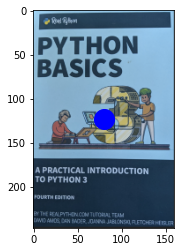

In [74]:
import matplotlib.pyplot as plt

img_rgb = cv.cvtColor(img.astype(np.float32), cv.COLOR_BGR2RGB)  # convert from BGR to RGB
fig = plt.figure(num='Matplotlib imshow')
plt.imshow(img_rgb)
plt.plot(img_cen_xy[0],img_cen_xy[1],color='blue',marker='o',linewidth=5,markersize=20)
plt.show()

Notice that Matplotlib supports inline plotting for Jupyter notebooks.  Now let's plot the image gradient image, `gx`, which we calculated above along with a colorbar:

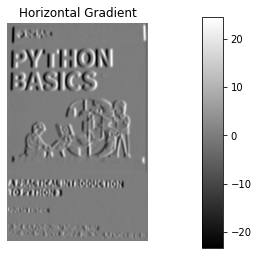

In [76]:
fig = plt.figure(num='Image Gradient')       # Create a figure names "Image Gradient"
ax = fig.subplots(1,1)                       # Divide into 1x1 set of axes (could make more)
pcm = ax.imshow(img_grad_x, cmap='gray')             # Show gx with a grayscale colormap
ax.axis('off')
plt.title('Horizontal Gradient')
cbax = fig.add_axes([0.8, 0.1, 0.05, 0.8])   # Add an axes at location (0.8, 0.1) for our colorbar
plt.colorbar(pcm, cax=cbax)                  
plt.show()                                   # Render the plot and wait for user to kill it


There is extensive documentation at [matplotlib.org/](matplotlib.org/) with many examples that are easily findable with a simple search.

## Broadcasting

Our final topic is that of broadcasting in Numpy.  This enables efficient repetitive operations on arrays.  But before describing it, let's review elementwise operations.  Start with two arrays of points:

In [77]:
import numpy as np
points = np.array([[1.,0.,0.],[1.,2.,1.],[3.,0.,1.],[4.,2.,0.]])
points

array([[1., 0., 0.],
       [1., 2., 1.],
       [3., 0., 1.],
       [4., 2., 0.]])

In [78]:
opoints = np.flip(points,axis=0)
opoints

array([[4., 2., 0.],
       [3., 0., 1.],
       [1., 2., 1.],
       [1., 0., 0.]])

If we add or multiply `points` and `opoints`, these operations are done elementwise.  For example:

In [79]:
spoints = points + opoints
spoints

array([[5., 2., 0.],
       [4., 2., 2.],
       [4., 2., 2.],
       [5., 2., 0.]])

For this to operate elementwise, it is important that `points` and `opoints` are the same shape.  Now, let's say we want to translate `spoints` by a single 3-vector:

In [ ]:
t = np.array([1.,4.,9.]) 

How might we add `t` to `spoints` so that it is added to each 3D point?  

One way would be to stack 4 copies of `t` along `axis=0` to create a new `4 X 3` matrix and then do an elementwise addition.  This works, but is tedious, and could be inefficient depending how it is done.  A better way is through **broadcasting**.  

I will describe broadcasting for adding two rank `N` arrays, `A` and `B`. (The same principles apply to other elementwise operations like multiplication and division.)  To add `A` and `B`: 
* The size of each corresponding dimension must be the same 

**OR** 
* If any dimension sizes differ, then one of the corresponding sizes must be 1.  

Any dimension of `A` or `B` that is 1 causes the array to be replicated along that dimension to equal the size of the other. 

Let's look at an example

In [80]:
A = np.eye(3)                  # A.shape: (3,3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [81]:
B = 2*np.arange(3)[:,None]     # [:,None] adds an extra empty dimension so that B.shape: (3,1)
B

array([[0],
       [2],
       [4]])

The `[:,None]` adds a new dimension along axis 1 and turns shape of B from `(3,) --> (3,1)`.  Now let's add these arrays:

In [82]:
C = A + B
C

array([[1., 0., 0.],
       [2., 3., 2.],
       [4., 4., 5.]])

To see what happened, let's compare the shapes of `A`: `(3,3)`, and `B`: `(3,1)`. Along axis 0, `A` and `B` have the same size.   Along axis 1 `A` has size 3 while `B` has size 1.  This means `B` will be replicated 3 times along axis 1.  So the following operation that will give the same result as broadcasting is:

In [83]:
C = A + np.repeat(B,3,axis=1)         # Explicitly replicate along axis 1
C

array([[1., 0., 0.],
       [2., 3., 2.],
       [4., 4., 5.]])

Using broadcasting this can be done more succinctly.   And broadcasting works for arrays of any number of dimensions.  

There is one more detail.  If `A` or `B` has fewer dimensions than the other, then additional leading dimensions of size 1 are added so that both arrays have the same number of dimensions.  Let's consider some examples and whether `A` and `B` can be broadcast to create `C`:

| `A.shape` | `B.shape` | `C.shape` or invalid |
| --- |--- | --- |
| `(6,4,2)` | `(6,1,2)` | `(6,4,2)` |
| `(4,2,5)` | `(4,3,5)` | invalid [Dimension 1 has a `2` and `3`] |
| `(3,1,2,6)` | `(3,5,2,1)` | `(3,5,2,6)` |
| `(5,4)` | `(3,5,1)` | `(3,5,4)` [A leading 1 is added to `(5,4) --> (1,5,4)`] |
| `(4,5)` | `(4,5,1)` | invalid [Adding a leading dimension to `A` gives size `(1,4,5)`]

Now let's return to our task of translating `spoints` with `t`.  

In [84]:
spoints = np.array([[5., 2., 0.], [4., 2., 2.], [4., 2., 2.], [5., 2., 0.]])
spoints

array([[5., 2., 0.],
       [4., 2., 2.],
       [4., 2., 2.],
       [5., 2., 0.]])

In [85]:
t = np.array([1.,4.,9.]) 
t

array([1., 4., 9.])

It should now be clear what we can simply add them:

In [86]:
npoints = spoints + t
npoints

array([[ 6.,  6.,  9.],
       [ 5.,  6., 11.],
       [ 5.,  6., 11.],
       [ 6.,  6.,  9.]])

What is happening here?  `spoints` is size `(4,3)` while `t` is size `(3,)`.  During broadcasting, `t` is first converted to size `(1,3)`, and then replicated four times along dimension 0 and then added.  Thus `t` is added to each of the four 3D points, effectively translating them by `t`. 

Here are some practice examples.  Predict what you will get from the following operations and then try them out:

In [87]:
np.ones( (3,1) ) * np.arange(4)


array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

In [88]:
np.ones( (2,4,3) ) * np.array( [2,4,8] )

array([[[2., 4., 8.],
        [2., 4., 8.],
        [2., 4., 8.],
        [2., 4., 8.]],

       [[2., 4., 8.],
        [2., 4., 8.],
        [2., 4., 8.],
        [2., 4., 8.]]])

Broadcasting is useful not only for operating on point cloud arrays, but also on image arrays.


___
### [Outline](README.md), Next: [Chapter 14: Conclusion](Chapter_14_Conclusion.md)